In [1]:
import numpy as np
import pandas as pd
from scipy.special import exp10
from matplotlib import pylab as plt

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, mean_squared_error

from spearmint.search import GPEISklearn

# Example 1: SVM for Classification

In [2]:
from sklearn import svm

sx = MinMaxScaler()
dt = datasets.load_breast_cancer()
x = sx.fit_transform(dt.data)
y = dt.target

ParaSpace = {'C':     {'Type': 'continuous', 'Range': [-6, 16], 'Wrapper': np.exp2}, 
             'gamma': {'Type': 'continuous', 'Range': [-16, 6], 'Wrapper': np.exp2}}

estimator = svm.SVC()
score_metric = make_scorer(accuracy_score, True)
cv = KFold(n_splits=5, random_state=0, shuffle=True)

clf = GPEISklearn(estimator, cv, ParaSpace, max_runs = 100, time_out = 10, refit = True, verbose = True)
clf.fit(x, y)
clf.logs

Iteration (1/100) with score: 0.62740.
Iteration (2/100) with score: 0.97719.
Iteration (3/100) with score: 0.63091.
Iteration (4/100) with score: 0.97544.
Iteration (5/100) with score: 0.95788.
Iteration (6/100) with score: 0.62740.
Iteration (7/100) with score: 0.96491.
Iteration (8/100) with score: 0.97018.
Iteration (9/100) with score: 0.97016.
Iteration (10/100) with score: 0.97544.
Iteration (11/100) with score: 0.95083.
Iteration (12/100) with score: 0.62740.
Iteration (13/100) with score: 0.97368.
Iteration (14/100) with score: 0.63091.
Iteration (15/100) with score: 0.97368.
Iteration (16/100) with score: 0.97368.
Iteration (17/100) with score: 0.97193.
Iteration (18/100) with score: 0.97368.
Iteration (19/100) with score: 0.97193.
Iteration (20/100) with score: 0.97368.
Iteration (21/100) with score: 0.97368.
Iteration (22/100) with score: 0.97368.
Iteration (23/100) with score: 0.62740.
Iteration (24/100) with score: 0.97368.
Iteration (25/100) with score: 0.96488.
Iteration

,C,gamma,score
0,0.015625,0.000015,0.627403
1,32.000000,0.031250,0.977193
2,65536.000000,64.000000,0.630911
3,65536.000000,0.000015,0.975439
4,55726.768343,0.002002,0.957879
5,0.015625,64.000000,0.627403
6,1139.910900,0.000109,0.964912
7,65536.000000,0.000196,0.970175
8,245.293265,0.001639,0.970160
9,65536.000000,0.000015,0.975439


A contour plot based on a thorough grid search

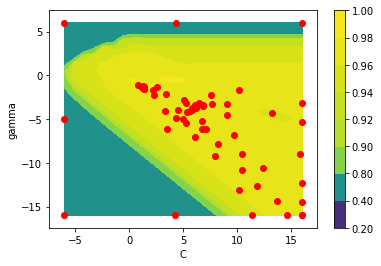

In [3]:
grid_num = 25
xlist = np.linspace(-6, 16, grid_num)
ylist = np.linspace(-16, 6, grid_num)
X, Y = np.meshgrid(xlist, ylist)
Z = np.zeros((grid_num,grid_num))
for i, C in enumerate(xlist):
    for j, gamma in enumerate(ylist):
        estimator = svm.SVC(C=2**C,gamma = 2**gamma)
        out = cross_val_score(estimator, x, y, cv = cv, scoring = score_metric)
        Z[j,i] = np.mean(out)
        
levels = [0.2, 0.4, 0.8, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0]
cp = plt.contourf(X, Y, Z, levels)
plt.colorbar(cp)
plt.xlabel('C')
plt.ylabel('gamma')
plt.scatter(np.log2(clf.logs.loc[:,['C']]), 
            np.log2(clf.logs.loc[:,['gamma']]), color = "red")
plt.show()

# Example 2: Xgboost for Regression

In [ ]:
import xgboost as xgb

dt = datasets.load_diabetes()
sx = MinMaxScaler()
x = sx.fit_transform(dt.data)
y = dt.target

ParaSpace = {'booster':          {'Type': 'categorical', 'Mapping': ['gbtree', 'gblinear']},
             'max_depth':        {'Type': 'integer',     'Mapping': np.linspace(2,10,9)}, 
             'n_estimators':     {'Type': 'integer',     'Mapping': np.linspace(100,500,401)},
             'min_child_weight': {'Type': 'integer',     'Mapping': np.linspace(1,100,100)},
             'subsample':        {'Type': 'continuous',  'Range': [0, 1],  'Wrapper': lambda x:x},
             'colsample_bytree': {'Type': 'continuous',  'Range': [0, 1],  'Wrapper': lambda x:x},
             'learning_rate':    {'Type': 'continuous',  'Range': [-5, 1], 'Wrapper': np.exp2},
             'gamma':            {'Type': 'continuous',  'Range': [-5, 1], 'Wrapper': np.exp2},
             'reg_lambda':       {'Type': 'continuous',  'Range': [-5, 1], 'Wrapper': np.exp2},
             'reg_lpha':         {'Type': 'continuous',  'Range': [-5, 1], 'Wrapper': np.exp2}}

estimator = xgb.XGBRegressor()
score_metric = make_scorer(mean_squared_error, False)
cv = KFold(n_splits=5, random_state=0, shuffle=True)

clf = GPEISklearn(estimator, cv, ParaSpace, max_runs = 100, scoring = score_metric, time_out = 30, refit = True, verbose = True)
clf.fit(x, y)
clf.logs

Iteration (1/100) with score: -28926.02099.
Iteration (2/100) with score: -3653.62978.
Iteration (3/100) with score: -3817.45976.
Iteration (4/100) with score: -4230.79829.
Iteration (5/100) with score: -4342.84370.
Iteration (6/100) with score: -4985.23304.
Iteration (7/100) with score: -4342.84370.
Iteration (8/100) with score: -3944.28984.
Iteration (9/100) with score: -3944.28984.
Iteration (10/100) with score: -3944.28984.
Iteration (11/100) with score: -3526.22895.
Iteration (12/100) with score: -3541.78292.
Iteration (13/100) with score: -3514.51431.
Iteration (14/100) with score: -3478.70581.
Iteration (15/100) with score: -3465.62346.
Iteration (16/100) with score: -3479.16903.
Iteration (17/100) with score: -3457.88275.
Iteration (18/100) with score: -3468.89206.
Iteration (19/100) with score: -3480.75473.
Iteration (20/100) with score: -3798.56789.
Iteration (21/100) with score: -3499.12769.
Iteration (22/100) with score: -3841.29808.
Iteration (23/100) with score: -3455.827

 # Example 3: Kmeans for Unsupervised Clustering  

In [ ]:
from sklearn.cluster import KMeans

sx = MinMaxScaler()
dt = datasets.load_iris()
x = sx.fit_transform(dt.data)
y = dt.target.reshape([-1,1])

ParaSpace = {'n_clusters':  {'Type': 'integer',    'Mapping': np.linspace(2,9,8)}, 
             'tol':         {'Type': 'continuous', 'Range': [-6, -3], 'Wrapper': exp10}}

estimator = KMeans()
cv = KFold(n_splits=5, random_state=0, shuffle=True)

clf = GPEISklearn(estimator, cv, ParaSpace, max_runs = 100, refit = True, verbose = True)
clf.fit(x, y)
clf.logs